<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/kNN_deploy_abril_09_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
import sklearn
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

knn = OneVsRestClassifier(KNeighborsClassifier())

In [3]:
!pip install mahotas

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
import mahotas.features.texture as mht
import mahotas.features

In [6]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021


In [7]:
!ls

ANN_Ajuste_mar_2021
ANN_FIND_GRAIN_MAR_2021.py
ANN_FIND_GRAIN_NOVO.py
ANN_FIND_GRAIN_PAPER_STEP_02.py
big_segment.py
CNN_classify_grain_feb_15_2021.ipynb
CNN_DESCRIPTION.ipynb
CNN_FIND_GRAIN_PAPER_STEP_02.py
Doutorado
EPOCHS_graphic.csv
EPOCHS_graphic.txt
Fig_05_BIG_Segmentation_jan_25_2021.ipynb
GetBetterSegm.py
Get_PSDArea_New.py
Graphic_Epochs_fev_09_2020.ipynb
histogram_fev_2021.py
PSD_CNN_GRAIN_NOT_GRAIN_step_02_paper.ipynb
PSD_GRAIN_NOT_GRAIN_dez_04_2020.ipynb
PSD_GRAIN_NOT_GRAIN_fev_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_11_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_12_2021.ipynb
PSD_GRAIN_NOT_GRAIN_step_02_paper.ipynb
psd_mahotas.py
__pycache__
README.md
Segment_Ajuste_mar_2021
SEGMENT_NOT_CONCLUDED.ipynb


In [8]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado


In [9]:
'''
# found drive
from google.colab import drive
drive.mount('drive')

#drive.mount('/content/gdrive')
'''

"\n# found drive\nfrom google.colab import drive\ndrive.mount('drive')\n\n#drive.mount('/content/gdrive')\n"

In [10]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [11]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.


In [12]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021


In [13]:
from big_segment import Segmenta  # got image provided segmented
# from ANN_FIND_GRAIN_NOVO import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [14]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021
%cd ANN_Ajuste_mar_2021

fatal: destination path 'ANN_Ajuste_mar_2021' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021


In [15]:
from ANN_FIND_GRAIN_change_ann import AnnGrain  # got image provided segmented

In [16]:
!ls

ANN_deploy_neural_network_mar_22_2021.ipynb
ANN_FIND_GRAIN_change_ann.py
ANN_load_neural_network_mar_23_2021.ipynb
ANN_load_top_okay_neural_network_mar_23_2021.ipynb
ANN_neural_network_load_mar_22_2021.ipynb
big_segment_new.py
Doutorado
knn_find_grain_change_classification.py
PSD_find_neural_network_mar_18_2021.ipynb
PSD_GRAIN_NOT_GRAIN_kNN_abril_07_2021.ipynb
PSD_GRAIN_NOT_GRAIN_mar_18_2021.ipynb
__pycache__


In [17]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado


In [18]:
# open file to get df 
# use df and ANN to get grains and no grains
# use grains to obtain psd

In [19]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/marquesgabi_paper_fev_2021/Doutorado/marquesgabi_paper_fev_2021/ANN_Ajuste_mar_2021/Doutorado/Doutorado


In [20]:
k=0
for Item in img_name:
  print(k,Item)
  k=k+1

foto_segmentada=ww[21]


0 Fotos_Grandes-3cdAmostra/Q6-8-4.jpg
1 Fotos_Grandes-3cdAmostra/Q6-5-3.jpg
2 Fotos_Grandes-3cdAmostra/Q6-7-4.jpg
3 Fotos_Grandes-3cdAmostra/Q6-8-2.jpg
4 Fotos_Grandes-3cdAmostra/Q6-3-2.jpg
5 Fotos_Grandes-3cdAmostra/Q6-7-2.jpg
6 Fotos_Grandes-3cdAmostra/Q6-4-4.jpg
7 Fotos_Grandes-3cdAmostra/Q6-9-5.jpg
8 Fotos_Grandes-3cdAmostra/Q6-2-5.jpg
9 Fotos_Grandes-3cdAmostra/Q6-8-3.jpg
10 Fotos_Grandes-3cdAmostra/Q6-9-3.jpg
11 Fotos_Grandes-3cdAmostra/Q6-1-2.jpg
12 Fotos_Grandes-3cdAmostra/Q6-6-3.jpg
13 Fotos_Grandes-3cdAmostra/Q6-3-4.jpg
14 Fotos_Grandes-3cdAmostra/Q6-1-4.jpg
15 Fotos_Grandes-3cdAmostra/Q6-6-2.jpg
16 Fotos_Grandes-3cdAmostra/Q6-4-3.jpg
17 Fotos_Grandes-3cdAmostra/Q6-7-3.jpg
18 Fotos_Grandes-3cdAmostra/Q6-2-2.jpg
19 Fotos_Grandes-3cdAmostra/Q6-9-2.jpg
20 Fotos_Grandes-3cdAmostra/Q6-1-5.jpg
21 Fotos_Grandes-3cdAmostra/Q6-6-5.jpg
22 Fotos_Grandes-3cdAmostra/Q6-2-1.jpg
23 Fotos_Grandes-3cdAmostra/Q6-5-2.jpg
24 Fotos_Grandes-3cdAmostra/Q6-4-1.jpg
25 Fotos_Grandes-3cdAmostra/Q6-3-1.

In [21]:
df

,Unnamed: 0,Type,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,Width
0,0,G,0.00000,0.00000,0.00315,0.00851,0.04608,0.16103,0.24925,0.34163,0.40151,0.42363,0.46514,0.52404,0.54213,0.52907,0.49368,0.47656,0.46535,0.44293,0.43458,0.54960,0.62182,0.65402,0.67005,0.68404,0.70101,0.72188,0.72956,0.72542,0.00000,0.00000,0.00090,0.00816,0.04123,0.16722,0.28024,0.36929,0.43575,0.48596,...,0.57247,0.50577,0.40034,0.42005,0.49448,0.54021,0.63239,0.66913,0.67656,0.67655,0.68100,0.00130,0.01038,0.01590,0.09138,0.49218,0.66831,0.69867,0.70930,0.70750,0.69464,0.67615,0.65429,0.65067,0.74506,0.72622,0.59420,0.53675,0.40354,0.28763,0.32523,0.40626,0.47360,0.50701,0.63270,0.67356,0.68642,0.68631,0.68769,NaN
1,1,G,0.00000,0.00000,0.00000,0.00309,0.00781,0.08288,0.25110,0.38233,0.51411,0.56924,0.58027,0.60092,0.60788,0.60130,0.59419,0.59183,0.60795,0.64601,0.67848,0.69677,0.70545,0.73198,0.74344,0.74678,0.74795,0.70517,0.63964,0.62419,0.00000,0.00000,0.00000,0.00309,0.01360,0.04156,0.19889,0.38310,0.54152,0.59908,...,0.87444,0.87989,0.83853,0.68274,0.52879,0.50917,0.51866,0.49799,0.45938,0.48510,0.52434,0.00784,0.00392,0.00701,0.01031,0.04876,0.33406,0.37898,0.36357,0.34806,0.31723,0.29845,0.30391,0.31748,0.39056,0.48932,0.50467,0.53739,0.54076,0.52627,0.49936,0.48514,0.48982,0.49884,0.50551,0.49065,0.47277,0.49262,0.50909,NaN
2,2,G,0.45321,0.52257,0.56642,0.56989,0.43670,0.36100,0.37534,0.36939,0.35353,0.35494,0.35494,0.31106,0.24504,0.24274,0.27542,0.26774,0.26129,0.25811,0.25810,0.26644,0.29359,0.30844,0.31510,0.32411,0.33934,0.35733,0.37670,0.39988,0.04326,0.05552,0.07551,0.09699,0.18983,0.32901,0.35796,0.36395,0.36040,0.36140,...,0.54463,0.55229,0.54773,0.53104,0.52842,0.52980,0.52848,0.53234,0.53154,0.52832,0.52296,0.35223,0.39280,0.45083,0.50061,0.54911,0.57563,0.53846,0.44977,0.42229,0.38602,0.33539,0.32225,0.34942,0.40470,0.44376,0.48571,0.53258,0.55060,0.56863,0.55021,0.52429,0.51987,0.51977,0.52343,0.53468,0.54645,0.54919,0.55439,NaN
3,3,G,0.75367,0.64590,0.62497,0.63117,0.60772,0.59781,0.59272,0.58272,0.57275,0.56277,0.55296,0.55087,0.53685,0.50884,0.47949,0.47467,0.46921,0.46706,0.46354,0.42246,0.35577,0.33393,0.32994,0.32207,0.47425,0.66448,0.71360,0.71226,0.76318,0.63869,0.58824,0.56483,0.54475,0.54590,0.54077,0.53631,0.52910,0.52916,...,0.49411,0.49043,0.46473,0.41648,0.38730,0.37650,0.40462,0.42461,0.41316,0.47899,0.61376,0.46481,0.46770,0.47330,0.47886,0.46485,0.45000,0.44123,0.43783,0.43812,0.44221,0.45076,0.45772,0.45711,0.45830,0.47089,0.48372,0.49282,0.50707,0.50889,0.51489,0.50507,0.46091,0.42387,0.42002,0.43764,0.43356,0.48524,0.61876,NaN
4,4,G,0.94521,0.89736,0.61852,0.51112,0.48211,0.44176,0.47943,0.55011,0.57942,0.58103,0.58870,0.58450,0.56669,0.54924,0.55583,0.67738,0.69853,0.70482,0.71610,0.73135,0.73698,0.74835,0.74909,0.73197,0.71697,0.71570,0.71089,0.70216,0.94706,0.89007,0.64413,0.56434,0.60500,0.65920,0.70258,0.71721,0.69906,0.65997,...,0.68747,0.67009,0.57161,0.51299,0.62049,0.77606,0.95059,0.98506,0.98854,0.98498,0.97282,0.62164,0.63590,0.65889,0.66631,0.67730,0.67407,0.63430,0.56748,0.53108,0.54691,0.59201,0.63914,0.66752,0.67940,0.68352,0.69941,0.70760,0.69960,0.68637,0.61679,0.52409,0.68172,0.92506,0.97829,0.98909,0.98942,0.98108,0.95838,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,45,Z,146.27896,149.26598,153.09581,158.36740,165.65904,171.07130,168.83978,154.74457,149.44240,155.47476,164.57732,170.22319,177.90962,181.07803,165.53870,148.43054,146.58084,151.22720,157.67633,160.70566,167.06297,173.02675,176.7

In [22]:
y_valor=df['Type']

quantidade= df.groupby('Type').size()

df_G = df[df["Type"] == "G"] 
Cut=['Unnamed: 0','Type','Width']
FotosG= df_G.drop(Cut,axis=1)


Size=28
img_G=[]

Num,cols=FotosG.shape
for i in range(Num):
  data=np.array(FotosG.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_G.append(img28)

df_Z = df[df["Type"] == "Z"] 
Cut=['Unnamed: 0','Type','Width']
FotosZ= df_Z.drop(Cut,axis=1)

# We'll choose which is grain and withdraw from 750 segmented photos

Size=28
img_Z=[]

Num,cols=FotosZ.shape
for i in range(Num):
  data=np.array(FotosZ.iloc[i]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img_Z.append(img28)

GRAO=[0,146,149,166,217,222,223,257,268,286,455,482,538,612,644,647,651,677] # 0 ate 749
GRAO=np.array(GRAO)
Ind=FotosZ.index
FotosNG=FotosZ.copy()
for i in GRAO:
  FotosNG=FotosNG.drop(Ind[i])

PERCENT=245.0/(len(FotosNG.index))
FotosNG=FotosNG.sample(frac=PERCENT, replace=True)

rows,col=FotosG.shape
y_total=[] # grao-->zero, nao grao-->1
for i in range(rows):
  y_total.append(0) #  # grao-->zero
for i in range(rows,(2*rows)):
  y_total.append(1) #  # nao grao-->zero

frames = [FotosG,FotosNG]
result = np.array(pd.concat(frames))/255
result_fotos = pd.concat(frames)

#Define data train and data test

W_train, W_test, yw_train, yw_test = train_test_split(result, np.array(y_total), 
                                                      test_size=0.30, shuffle=True, 
                                                      random_state=42)

fotos_train, fotos_test, fotos_yw_train, fotos_yw_test = train_test_split(result_fotos, np.array(y_total), 
                                                                          test_size=0.30, shuffle=True, 
                                                                          random_state=42)

train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta esperada para o treino
test_images=W_test
test_labels=yw_test

''''
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', 
                      solver='adam',random_state=1, max_iter=300).fit(train_images,train_labels)
  
prediction = model.predict(test_images)
'''
knn.fit(train_images,train_labels)
prediction = knn.predict(test_images)
  
y_valor=np.copy(yw_test)
data = {'y_Actual': y_valor,'y_Predicted': prediction}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])


confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

y_true = df['y_Actual']
y_pred = df['y_Predicted']
  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
  

Predicted   0   1
Actual           
0          72   0
1           1  74


In [23]:
joblib.dump(knn,'model_knn.pkl')

['model_knn.pkl']

In [24]:
Arq = 'model_knn.pkl'
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
k =0; lista =[]
for Ind in yw_train:
  if(Ind == 0):
    lista.append(k)
  k = k +1


In [26]:
k =0; listaNG =[]
for Ind in yw_train:
  if(Ind == 1):
    listaNG.append(k)
  k = k +1

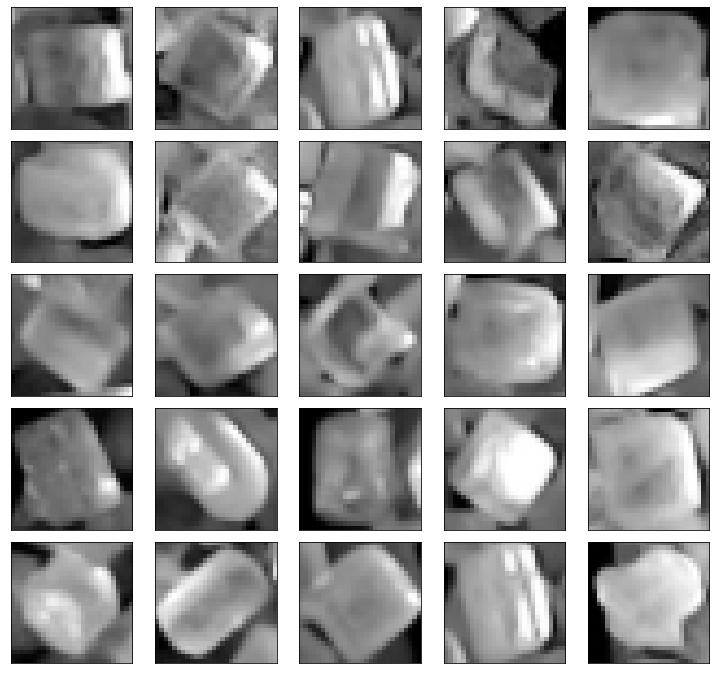

In [27]:

df = pd.DataFrame(fotos_train)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[lista[i],:]).reshape(Size,Size)
  #img = Image.fromarray(data.astype('uint8'), mode='L')
  #img=np.float32(img)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

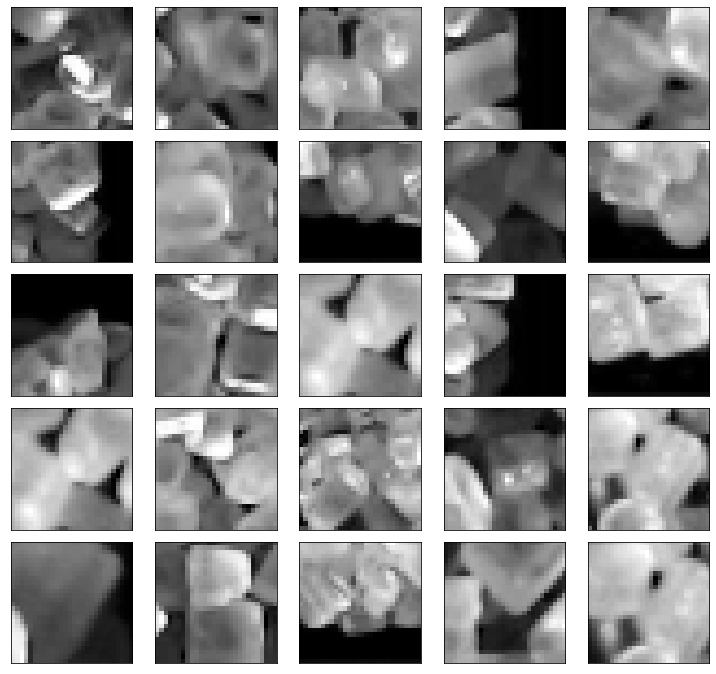

In [28]:

df = pd.DataFrame(fotos_train)
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[listaNG[i],:]).reshape(Size,Size)
  #img = Image.fromarray(data.astype('uint8'), mode='L')
  #img=np.float32(img)
  img = data
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)